In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [2]:
n = 1000000
prime=[2]
for i in range(3, n+1, 2):
    if (i > 10) and (i%10==5): #исключаем числа, кратные 2 и 5
        continue
    for j in prime:
        if j*j-1 > i:
            prime.append(i)
            break
        if (i % j == 0):
            break
    else:
        prime.append(i)

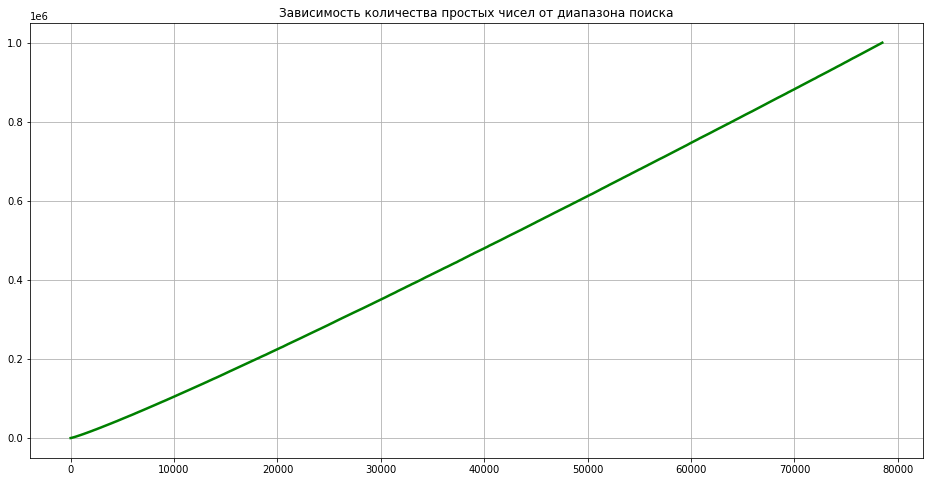

In [3]:
plt.figure(figsize=(16,8))
plt.plot(prime, color = 'g', linewidth = 2.5)
plt.grid()
plt.title('Зависимость количества простых чисел от диапазона поиска')
plt.show()

In [4]:
diff = np.diff(prime)

In [5]:
print(f'Мода: {st.mode(diff)}')
print(f'Медиана: {st.median(diff)}')
print(f'Минимальная разность: {diff.min()}')
print(f'Максмальная разность: {diff.max()}')
print(f'Средняя разность: {diff.mean().round(2)}')

Мода: 6
Медиана: 10
Минимальная разность: 1
Максмальная разность: 114
Средняя разность: 12.74


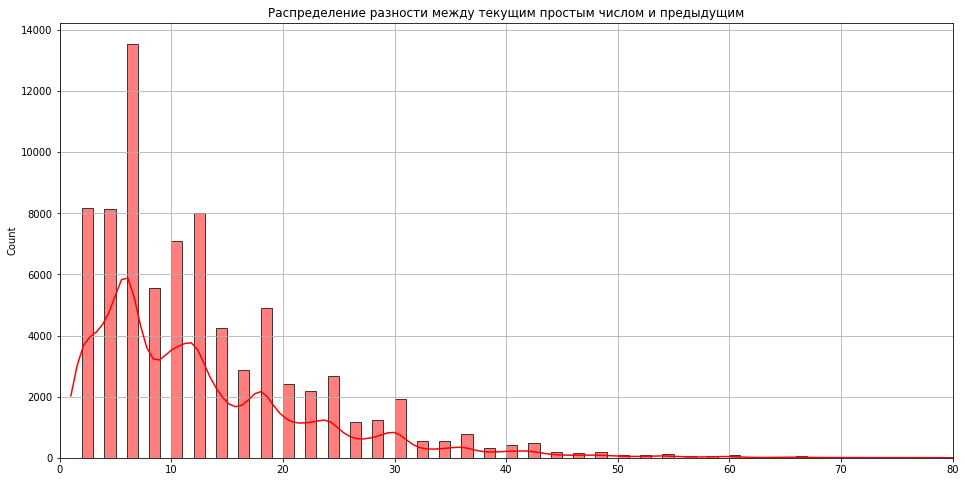

In [6]:
plt.figure(figsize=(16,8))
sns.histplot(diff, color = 'r', bins='auto', binwidth=1, kde=True)
plt.grid()
plt.xlim(0, 80)
plt.title('Распределение разности между текущим простым числом и предыдущим')
plt.show()

**Наблюдение:** Чаще всего простые числа отличаются друг от друга на 6

In [7]:
#Сумма цифр для каждого простого числа
sum_digits = []
for i in prime:
    s = 0
    while i!=0:
        s += i%10
        i //= 10
    sum_digits.append(s)

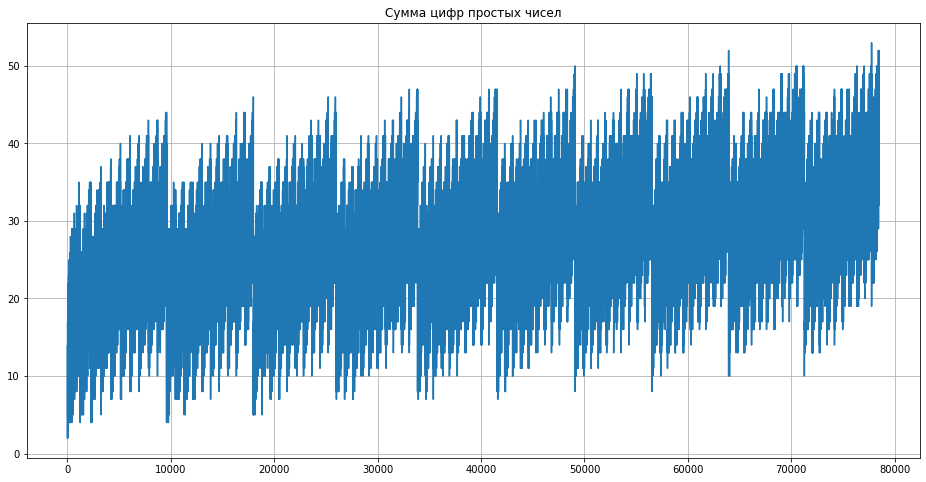

In [8]:
plt.figure(figsize=(16,8))
plt.plot(sum_digits)
plt.grid()
plt.title('Сумма цифр простых чисел')
plt.show()

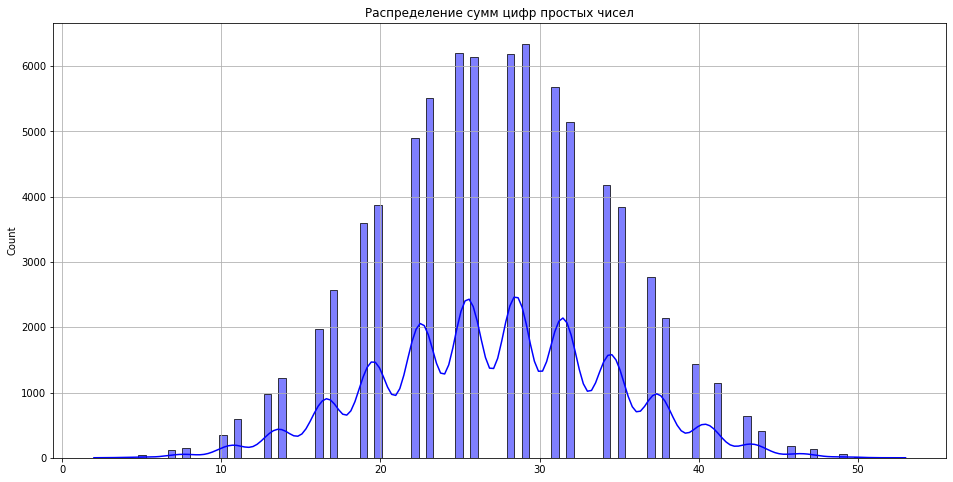

In [9]:
plt.figure(figsize=(16,8))
sns.histplot(sum_digits, color = 'b', kde=True)
plt.grid()
plt.title('Распределение сумм цифр простых чисел')
plt.show()

In [10]:
#Произведение цифр для каждого простого числа
prod_digits = []
for i in prime:
    p = 1
    while i!=0:
        p *= i%10
        i //= 10
    prod_digits.append(p)

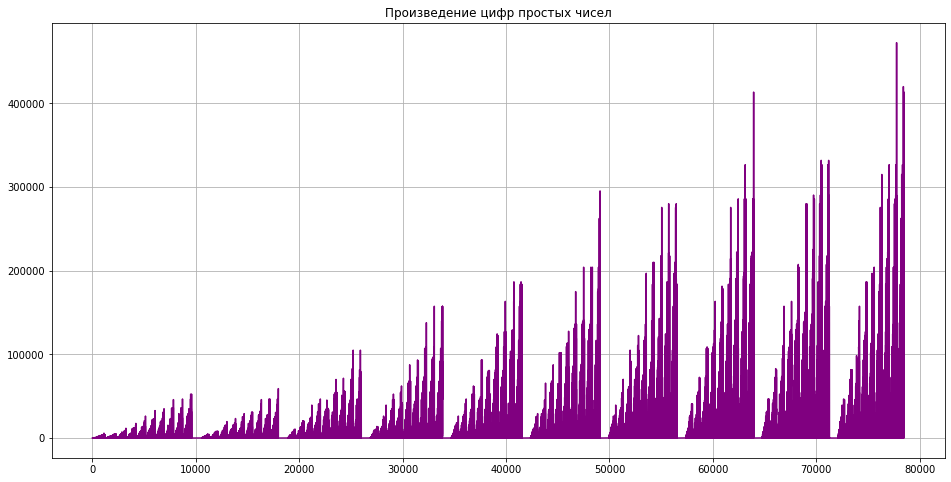

In [11]:
plt.figure(figsize=(16,8))
plt.plot(prod_digits, color = 'purple')
plt.grid()
plt.title('Произведение цифр простых чисел')
plt.show()

**Вопрос:** Произведение цифр какого простого числа максимально?

In [12]:
max_prod_prime_pos = prod_digits.index(max(prod_digits))
prime[max_prod_prime_pos]

989999

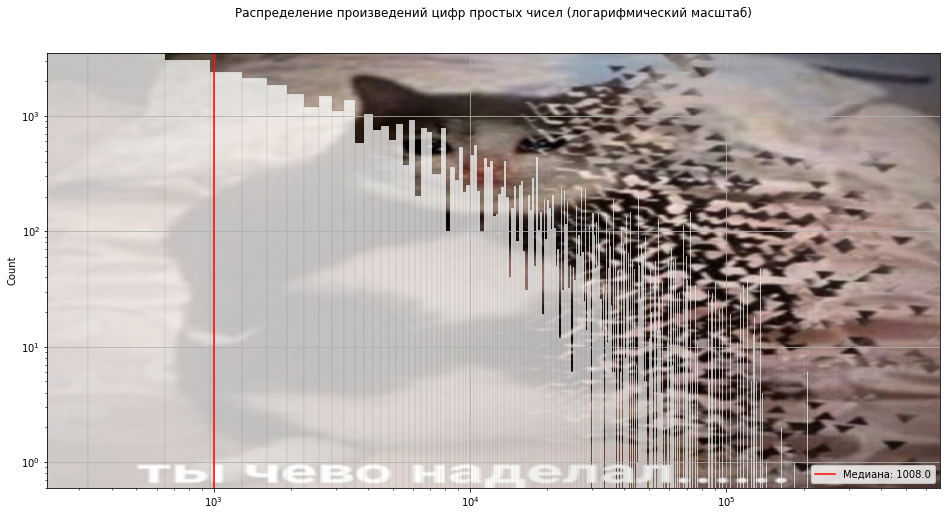

In [13]:
plt.figure(figsize=(16,8))
ax = plt.gca()
sns.histplot(prod_digits, color = 'w')
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(top = 3500)
ax.axvline(st.median(prod_digits), color = 'r', label = f'Медиана: {st.median(prod_digits)}')
ax.set_title('Распределение произведений цифр простых чисел (логарифмический масштаб)')

#Настройка осей для того, чтобы изображение нормально отображалось на логарифмических осях
ax.set_zorder(2)
ax.set_facecolor('none')
ax_tw_x = ax.twinx()
ax_tw_x.axis('off')
ax2 = ax_tw_x.twiny()

#Читаем изображение
img = plt.imread(r"C:\Users\Максим\Pictures\Saved Pictures\ty-chevo-nadelal-1.jpg") #путь к фото с котиком
ax2.imshow(img, extent=[100, 5000000, 1, 5000], aspect='auto')
ax2.axis('off')

ax.legend(loc='lower right')
plt.show()

In [14]:
#Первые цифры каждого простого числа
first_digits = []
for n in prime:
    while n != 0:
        n1 = n
        n = n // 10
    first_digits.append(n1)

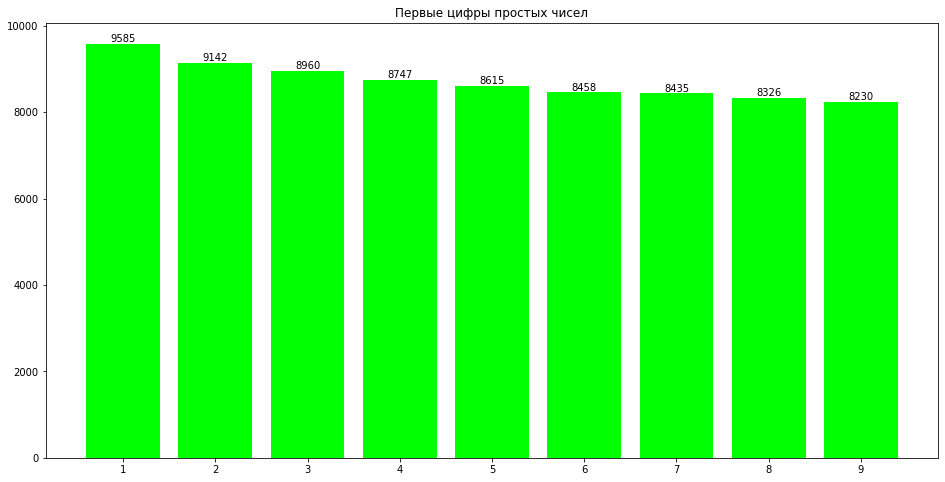

In [15]:
plt.figure(figsize=(16,8))
x = np.arange(1, 10)
y = [first_digits.count(i) for i in set(first_digits)]
bar_plot = plt.bar(x, y, color = 'lime')

#Текст над столбцами
for idx,rect in enumerate(bar_plot):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1*height,
            y[idx],
            ha='center', va='bottom', rotation=0)

plt.xticks(x)
plt.title('Первые цифры простых чисел')
plt.show()

In [16]:
#Последние цифры каждого простого числа
last_digits = []
for n in prime:
    ld = n % 10
    last_digits.append(ld)

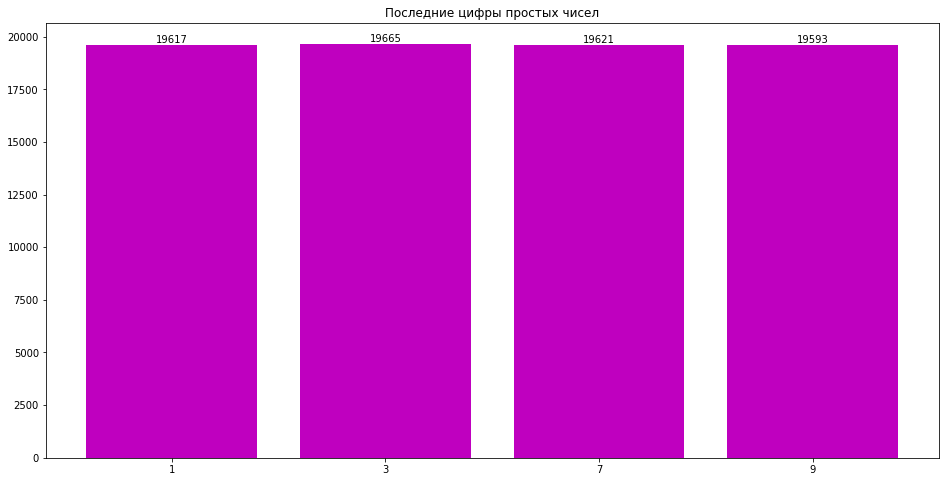

In [17]:
plt.figure(figsize=(16,8))
x = [str(i) for i in [1, 3, 7, 9]]
y = [last_digits.count(i) for i in [1, 3, 7, 9]]
bar_plot1 = plt.bar(x, y, color = 'm')

#Текст над столбцами
for idx,rect in enumerate(bar_plot1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1*height,
            y[idx],
            ha='center', va='bottom', rotation=0)

plt.xticks(x)
plt.title('Последние цифры простых чисел')
plt.show()

**Наблюдение:** Чаще всего простые числа начинаются на единицу, но заканчиваются на 1, 3, 7, 9 в примерно равном количестве

In [18]:
#Сумма первых и последних цифр
sum_first_last = [x+y for x,y in zip(first_digits, last_digits)]

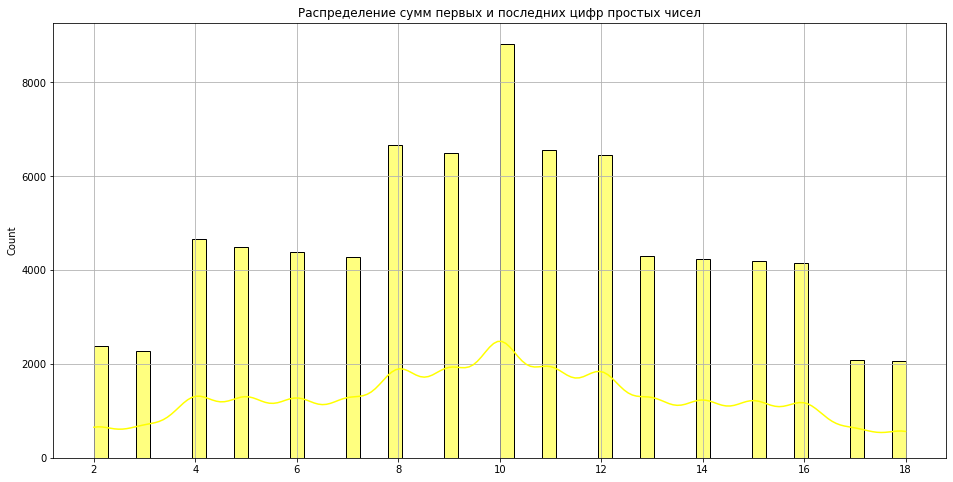

In [20]:
plt.figure(figsize=(16,8))
sns.histplot(sum_first_last, color = 'yellow', kde=True)
plt.grid()
plt.title('Распределение сумм первых и последних цифр простых чисел')
plt.show()

In [ ]:
#Произведение первых и последних цифр
prod_first_last = [x*y for x,y in zip(first_digits, last_digits)]
plt.figure(figsize=(16,8))
plt.plot(prod_first_last, color = 'dodgerblue')
plt.grid()
plt.title('Произведение первых и последних цифр простых чисел')
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
x = [str(i) for i in list(set(prod_first_last))]
y = [prod_first_last.count(i) for i in list(set(prod_first_last))]
df = pd.DataFrame({'x':x, 'y':y}).sort_values(by='y')
plt.barh(df['x'], df['y'], color = 'springgreen')
plt.title('Распределение произведений первых и последних цифр простых чисел')
plt.show()

In [ ]:
z = np.arange(1,1000001).reshape(1000, 1000)
np.isin(z, prime) 

In [ ]:
plt.figure(figsize=(20,20))
my_cmap = sns.dark_palette("#2ecc71", as_cmap=True)
sns.heatmap(np.isin(z, prime), cmap=my_cmap, cbar=False)
plt.title('Простые числа до миллиона')
plt.xticks(range(1, 1001, 100))
plt.yticks(range(1, 1001, 100))
plt.savefig('Простые числа.jpg')
plt.show()

In [ ]:
#Простые числа до 100
plt.figure(figsize=(12, 12))
r = prime[:25]
theta = prime[:25]
ax = plt.subplot(111,polar=True, facecolor='k')
ax.scatter(theta, r, s=25, c='yellow')
ax.grid(True, color='b')
#ax.set_yticklabels([])
plt.show()

Видеоролик про простые числа и спирали:
https://www.youtube.com/watch?v=DxntHp7-wbg&ab_channel=VertDider

In [ ]:
plt.figure(figsize=(12, 12))
r = prime[:1229]
theta = prime[:1229]
ax = plt.subplot(111,polar=True, facecolor='k')
ax.scatter(r, theta, s=1, c='yellow')
ax.grid(False)
ax.set_yticklabels([])
plt.show()

In [ ]:
plt.figure(figsize=(100, 100))
r = prime
theta = prime
ax = plt.subplot(111,polar=True, facecolor='k')
ax.scatter(r, theta, s=50, c='yellow')
ax.grid(False)
ax.set_yticklabels([])
# plt.savefig('Простые числа polar.jpg')
plt.show()

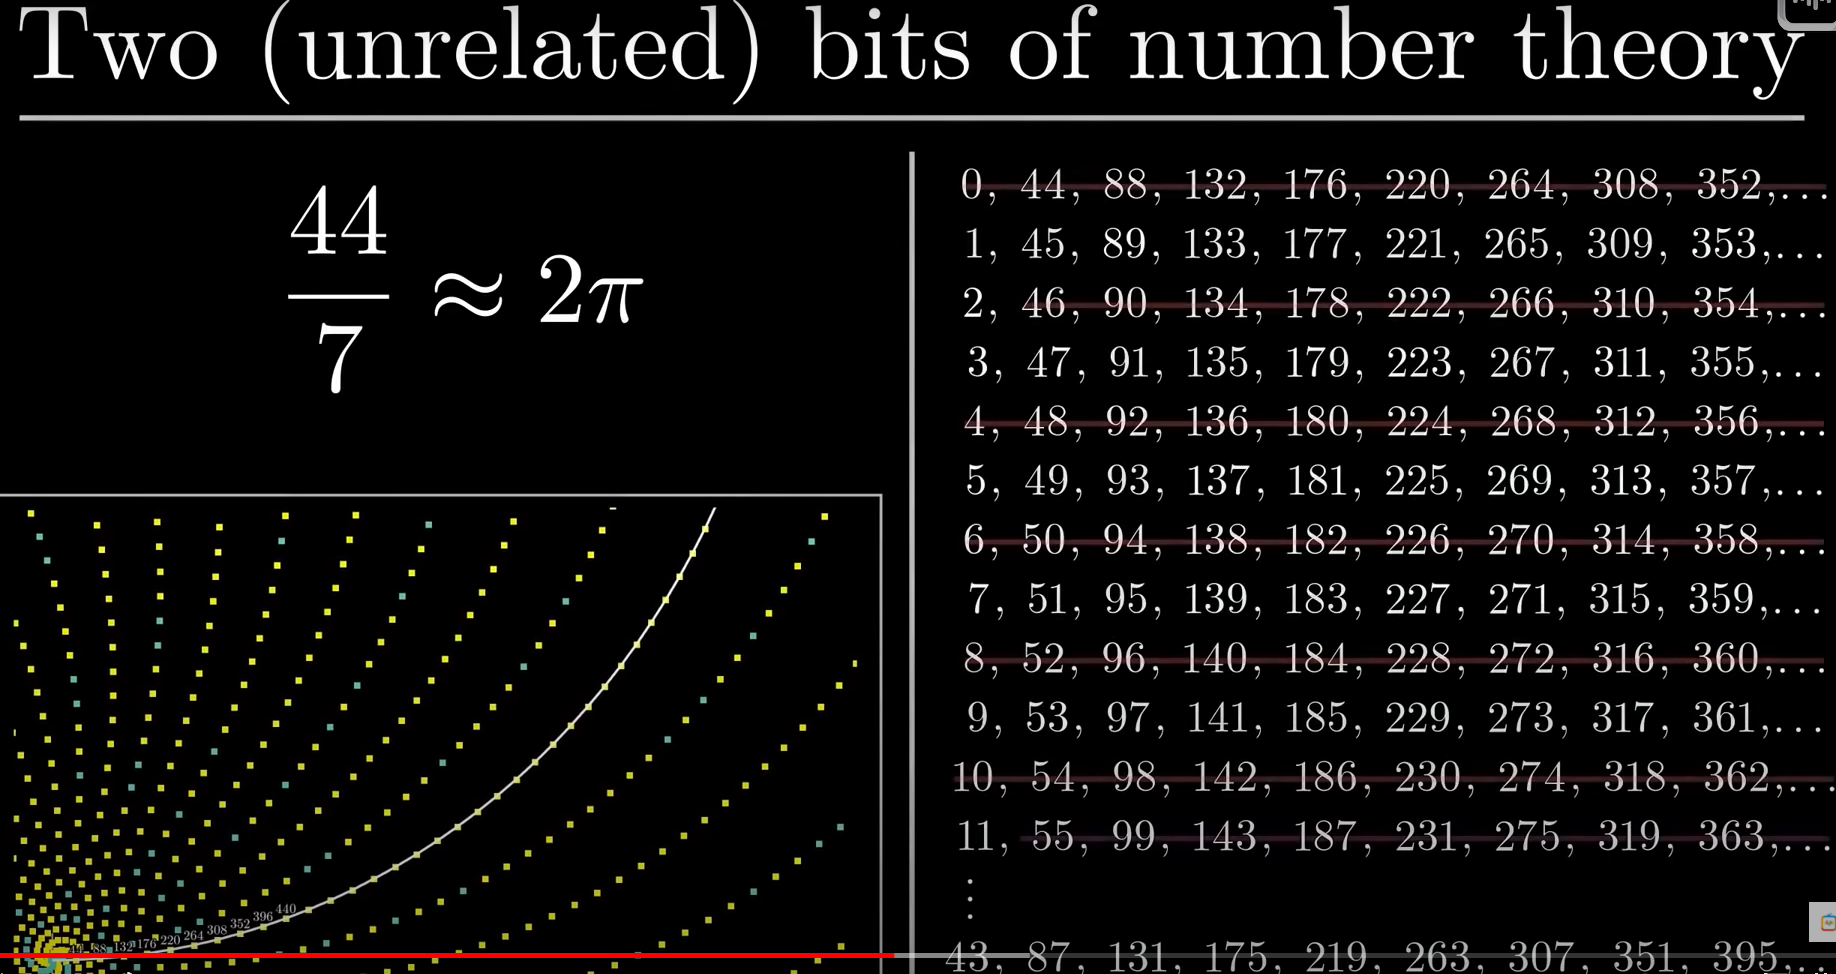

In [ ]:
#Класс вычетов по модулю 44 (residue classes mod 44)
rc_44 = np.concatenate([np.arange(0+i, 999956+i, 44) for i in range(0, 44)]).reshape(44, 999956//44+1)
rc_44_1 = np.where((rc_44%2 == 0) | (rc_44%11==0), 0, rc_44)
mask = np.isin(rc_44_1, prime)
rc_44_1 = np.where(mask == False, 0, rc_44_1)
rc_44_1 = [i[i != 0] for i in rc_44_1]

In [ ]:
rc_44_count = []
for i in rc_44_1:
    rc_44_count.append(len(i))
print(rc_44_count)

In [ ]:
plt.figure(figsize=(16, 8))
x = range(0, 44)
y = [100*i/sum(rc_44_count) for i in rc_44_count]
plt.bar(x,y, color = 'limegreen')
plt.ylim(0, 10)
plt.title('Распределение простых чисел в классах вычетов по модулю 44')
plt.xlabel('Классы вычета по модулям')
plt.ylabel('Доля чисел каждого класса вычета')
plt.grid(axis = 'y')
plt.xticks(x)
plt.show()

In [ ]:
#Класс вычетов по модулю 710 (residue classes mod 710)
rc_710 = np.concatenate([np.arange(0+i, 999290+i, 710) for i in range(0, 710)]).reshape(710, 999290//710+1)
rc_710_1 = np.where((rc_710%2 == 0) | (rc_710%5==0) | (rc_710%71==0), 0, rc_710)
mask = np.isin(rc_710_1, prime)
rc_710_1 = np.where(mask == False, 0, rc_710_1)
rc_710_1 = [i[i != 0] for i in rc_710_1]

In [ ]:
rc_710_count = [] #Кол-во чисел в каждой ветке
for i in rc_710_1:
    rc_710_count.append(len(i))

In [ ]:
counter = 0 #Кол-во ненулевых классов вычета
for i in rc_710_count:
    if i != 0:
        counter += 1
counter        

**Наблюдение:** количество веток равно 280 неспроста. Это число означает кол-во взаимно простых чисел с 710 (чисел, не имеющих общих делителей с 710)

In [ ]:
sum(rc_44_count)

In [ ]:
sum(rc_710_count)

In [ ]:
len(prime)

**Наблюдение:** в любой из классов вычетов по модулю попадут все простые числа, но их количество в каждой ветке будет разным.

In [ ]:
plt.figure(figsize=(16, 8))
x = range(0, 710)
y = [100*i/sum(rc_710_count) for i in rc_710_count]
plt.bar(x,y, color = 'rebeccapurple', width=2)
plt.ylim(0, 1)
plt.title('Распределение простых чисел в классах вычетов по модулю 44')
plt.xlabel('Классы вычета по модулям')
plt.ylabel('Доля чисел каждого класса вычета')
plt.grid(axis = 'y')
plt.show()

**Наблюдение:** распределение количества простых чисел в каждом классе вычетов по модулю будет практически равномерным

In [ ]:
prime_r = [] #Перевернутые простые числа
for i in prime:
    i = str(i)[::-1]
    prime_r.append(int(i))
len(prime_r)

In [ ]:
common = sorted(set(prime).intersection(prime_r))
len(common)

In [ ]:
palindroms=[]
for i in prime:
    i = str(i)
    if i == i[::-1]:
        palindroms.append(int(i))       

In [ ]:
print(f'Доля простых чисел, имеющих перевернутую пару (без учета палиндромов): {round(100*(len(common)-len(palindroms))/(2*len(prime)),2)}%')